In [0]:
# Loading the data...

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

pitches = drive.CreateFile({'id':'12S9Mc5HCehr6SXG_ZLhK3A4P5qooksot'}) 
pitches.GetContentFile('pitches.csv')  
pitches = pd.read_csv('pitches.csv')

In [3]:
pitches = pitches[['start_speed', 'end_speed', 'spin_rate', 'break_length', 'type', 'pitch_type', 'ab_id']]
pitches = pitches.dropna()
pitches.head()

year = []
for entry in pitches.ab_id:
  current = str(entry)
  current = current[0:4]
  year.append(current)

pitches['year'] = year

pitches.head()

,start_speed,end_speed,spin_rate,break_length,type,pitch_type,ab_id,year
0,92.9,84.1,2305.052,3.2,S,FF,2.015000e+09,2015
1,92.8,84.1,2689.935,3.4,S,FF,2.015000e+09,2015
2,94.1,85.2,2647.972,3.7,S,FF,2.015000e+09,2015
3,91.0,84.0,1289.590,5.0,B,FF,2.015000e+09,2015
4,75.4,69.6,1374.569,12.0,B,CU,2.015000e+09,2015


In [0]:
pitches_15 = pitches[pitches.year == '2015']
pitches_16 = pitches[pitches.year == '2016']
pitches_17 = pitches[pitches.year == '2017']
pitches_18 = pitches[pitches.year == '2018']

In [5]:
print(pitches_15.pitch_type.value_counts())

pitches_15_ff = pitches_15[pitches_15.pitch_type == 'FF']
pitches_16_ff = pitches_16[pitches_16.pitch_type == 'FF']
pitches_17_ff = pitches_17[pitches_17.pitch_type == 'FF']
pitches_18_ff = pitches_18[pitches_18.pitch_type == 'FF']

pitches_15_sl = pitches_15[pitches_15.pitch_type == 'SL']
pitches_16_sl = pitches_16[pitches_16.pitch_type == 'SL']
pitches_17_sl = pitches_17[pitches_17.pitch_type == 'SL']
pitches_18_sl = pitches_18[pitches_18.pitch_type == 'SL']

pitches_15_ft = pitches_15[pitches_15.pitch_type == 'FT']
pitches_16_ft = pitches_16[pitches_16.pitch_type == 'FT']
pitches_17_ft = pitches_17[pitches_17.pitch_type == 'FT']
pitches_18_ft = pitches_18[pitches_18.pitch_type == 'FT']

pitches_15_ch = pitches_15[pitches_15.pitch_type == 'CH']
pitches_16_ch = pitches_16[pitches_16.pitch_type == 'CH']
pitches_17_ch = pitches_17[pitches_17.pitch_type == 'CH']
pitches_18_ch = pitches_18[pitches_18.pitch_type == 'CH']

pitches_15_si = pitches_15[pitches_15.pitch_type == 'SI']
pitches_16_si = pitches_16[pitches_16.pitch_type == 'SI']
pitches_17_si = pitches_17[pitches_17.pitch_type == 'SI']
pitches_18_si = pitches_18[pitches_18.pitch_type == 'SI']

print(stats.ttest_ind(pitches_15_ff['start_speed'], pitches_17_ff['start_speed']))
print(stats.ttest_ind(pitches_15_sl['start_speed'], pitches_17_sl['start_speed']))
print(stats.ttest_ind(pitches_15_ft['start_speed'], pitches_17_ft['start_speed']))
print(stats.ttest_ind(pitches_15_ch['start_speed'], pitches_17_ch['start_speed']))
print(stats.ttest_ind(pitches_15_si['start_speed'], pitches_17_si['start_speed']))

print(stats.f_oneway(pitches_15_ff['start_speed'], pitches_16_ff['start_speed'], pitches_17_ff['start_speed'], pitches_18_ff['start_speed']))

FF    249755
SL    101914
FT     80547
CH     74019
SI     68563
CU     53081
FC     38779
KC     15757
FS     11218
KN      3692
IN      3159
EP       319
PO       240
FO       198
UN        22
FA         9
SC         7
AB         2
Name: pitch_type, dtype: int64
Ttest_indResult(statistic=-94.15237806470869, pvalue=0.0)
Ttest_indResult(statistic=-20.37442682954871, pvalue=3.4337118739201834e-92)
Ttest_indResult(statistic=-59.79457343744493, pvalue=0.0)
Ttest_indResult(statistic=-42.898044012020605, pvalue=0.0)
Ttest_indResult(statistic=-15.67647798695489, pvalue=2.4892170370950652e-55)
F_onewayResult(statistic=4942.662938859677, pvalue=0.0)


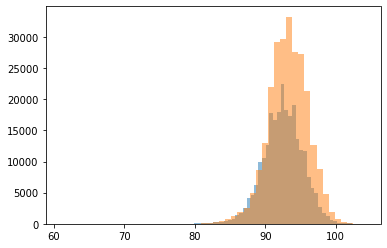

DescribeResult(nobs=249755, minmax=(76.7, 103.4), mean=92.48138255490377, variance=7.82116015200474, skewness=-0.2998463007108673, kurtosis=0.6437803045356212)
DescribeResult(nobs=253387, minmax=(61.0, 104.2), mean=93.22313141558169, variance=7.792148982765395, skewness=-0.5336550779719412, kurtosis=2.70113488007751)
249755


In [0]:
plt.hist(pitches_15_ff['start_speed'], bins = 50, alpha = .5)
plt.hist(pitches_17_ff['start_speed'], bins = 50, alpha = .5)
plt.show()

print(stats.describe(pitches_15_ff['start_speed']))
print(stats.describe(pitches_17_ff['start_speed']))

In [6]:
print(pitches_17.describe())
print(pitches_15.describe())

         start_speed      end_speed      spin_rate   break_length         ab_id
count  718803.000000  718803.000000  718803.000000  718803.000000  7.188030e+05
mean       88.632595      81.381617    1805.898046       6.702945  2.017093e+09
std         6.022371       5.376019     735.558158     265.262989  5.356846e+04
min        40.900000      38.100000       2.595000       0.100000  2.017000e+09
25%        84.500000      77.900000    1249.204500       4.200000  2.017047e+09
50%        90.000000      82.600000    1951.298000       5.900000  2.017093e+09
75%        93.300000      85.400000    2376.545000       7.900000  2.017139e+09
max       104.200000      96.400000    6362.899000  224889.300000  2.017186e+09
         start_speed      end_speed      spin_rate   break_length         ab_id
count  701281.000000  701281.000000  701281.000000  701281.000000  7.012810e+05
mean       88.126716      81.353033    1725.461170       6.519949  2.015092e+09
std         5.996314       5.351293     